### 1. Analytical methods vs numerical methods
While simple ODEscan be solved with analytical methods, non-linear ODEs are generally not possible to solve in this way, and we need to apply numerical methods.

#### General abstract notation for an arbitrary ODE

$$x^{'}(t) = \dot{x}(t) = f(x(t), t)$$

which means that the ODE is fully specified by the definition of the righthand side function $f(x,t)$. Examples of this function may be:
- $f(x, t) = r x$, exponential growth
- $f(x, t) = r x (1 - \frac{x}{k})$, logist growrh

Our aim is now to write functions and classes that take $f$ as input, and solve the corresponding ODE to produce $x$ as output.

In [1]:
from scipy.integrate import ode
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def logistic_growth(t, x, arg1: dict):
    r = arg1['r']
    k = arg1['k']
    dxdt = r * x * (k - x)/k
    return dxdt

In [3]:
t0 = 0
x0 = 100
arg1 = {'r': 0.04, 'k': 200}

In [4]:
r = ode(logistic_growth).set_integrator('zvode', method='bdf')
r.set_initial_value(y=x0, t=t0).set_f_params(arg1)

t1 = 100
dt = 1
x_collect = [] 
while r.successful() and r.t < t1:
    t_inx = r.t + dt
    x_t = np.real(r.integrate(t_inx))  # convert to real number
    # print(t_inx, x_t)
    x_collect.append(x_t[0])

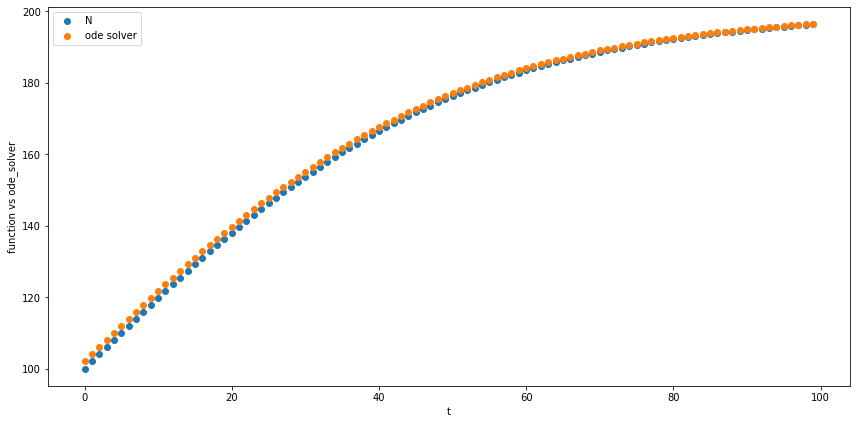

In [9]:
t = np.linspace(0, 99, 100)
N0 = 100
r = 0.04
k = 200
N = k / (1 + np.power(np.e, -0.04*t))
# fig, ax = plt.subplots()
plt.figure(figsize=(12, 6))
plt.scatter(t, N, label='N')
plt.scatter(t, x_collect, label='ode solver')
plt.xlabel('t')
plt.ylabel('function vs ode_solver')
plt.legend()
plt.tight_layout()